In [273]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [274]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [275]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [276]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [277]:
subsample_x = subset.iloc[:,:-1].values
subsample_y = subset.iloc[:,-1].values

In [278]:
#clf_subsample = SVC(kernel='linear',C=1,gamma='auto')
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#subsample_x = min_max_scaler.fit_transform(subsample_x)
#subsample_x = preprocessing.scale(subsample_x)
print(subsample_x)
clf_subsample = LinearRegression()
clf_subsample.fit(subsample_x, subsample_y)
importance = clf_subsample.coef_

acc = 0

for i,v in enumerate(importance):
    print(i,v)
    acc += abs(v)

for i,v in enumerate(importance):
   print(abs(v)/acc)

[[4.8 3.1]
 [5.1 3.5]
 [6.  3. ]
 [5.8 2.7]
 [7.6 3. ]
 [5.1 3.4]
 [5.7 2.5]
 [6.1 2.8]
 [5.5 2.4]
 [4.9 2.4]
 [4.4 3. ]
 [6.8 2.8]
 [7.7 2.8]
 [4.8 3.4]
 [6.  2.9]
 [6.2 2.9]
 [5.7 4.4]
 [4.8 3. ]
 [5.8 2.8]
 [6.3 3.3]
 [4.9 3.6]
 [4.8 3. ]
 [4.9 3. ]
 [6.1 2.6]
 [6.2 2.8]
 [7.7 2.6]
 [5.1 3.5]
 [5.6 3. ]
 [4.7 3.2]
 [5.4 3.7]]
0 0.3166287926250703
1 -0.6168170867712136
0.33920423199023964
0.6607957680097605


In [279]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [280]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [281]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [282]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3*0.339
e2 = temp['x2'].mean()*0.3*0.661

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.396442,1.0
351,6.3,2.796442,1.0
352,6.4,2.496442,1.0
353,6.8,2.596442,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


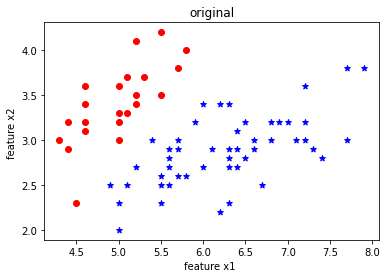

BESVM Accuracy (on training) = with x1 bounded error (30%*0.339),x4 with error (30%*0.661) : 0.897887323943662
BESVM Accuracy (on testing) = with x1 bounded error (30%*0.339),x4 with error (30%*0.661) : 0.8873239436619719


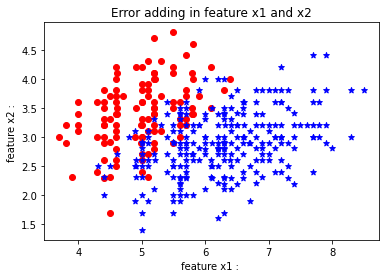

In [283]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.339),x4 with error (30%*0.661) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (30%*0.339),x4 with error (30%*0.661) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [284]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3*0.661
e2 = temp['x2'].mean()*0.3*0.339

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,4.6,3.10000,0.0
1,5.0,3.60000,0.0
2,4.6,3.40000,0.0
3,4.4,2.90000,0.0
4,4.3,3.00000,0.0
...,...,...,...
350,7.7,2.69046,1.0
351,6.3,3.09046,1.0
352,6.4,2.79046,1.0
353,6.8,2.89046,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


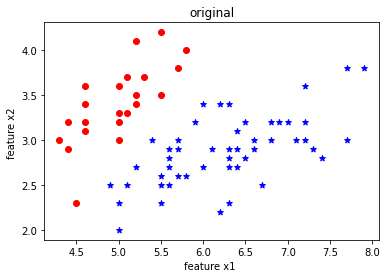

BESVM Accuracy (on training) = with x1 bounded error (30%*0.661),x4 with error (30%*0.339) : 0.8838028169014085
BESVM Accuracy (on testing) = with x1 bounded error (30%*0.661),x4 with error (30%*0.339) : 0.8450704225352113


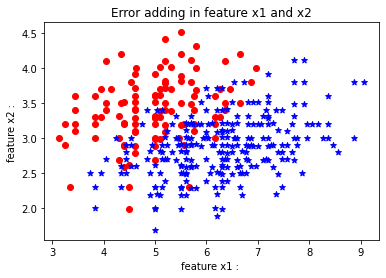

In [285]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.661),x4 with error (30%*0.339) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (30%*0.661),x4 with error (30%*0.339) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


above are feature x1 , x2
below are feature x3 , x4

In [286]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , 2:4]
df_2feature[4]  = y
print(df_2feature,df_2feature[4].value_counts())

       2    3  4
0    1.4  0.2  0
1    1.4  0.2  0
2    1.3  0.2  0
3    1.5  0.2  0
4    1.4  0.2  0
..   ...  ... ..
145  5.2  2.3  2
146  5.0  1.9  2
147  5.2  2.0  2
148  5.4  2.3  2
149  5.1  1.8  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 4, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [287]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x3','x4','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

1    100
0     50
Name: y, dtype: int64       x3   x4  y
0    1.4  0.2  0
1    1.4  0.2  0
2    1.3  0.2  0
3    1.5  0.2  0
4    1.4  0.2  0
..   ...  ... ..
145  5.2  2.3  1
146  5.0  1.9  1
147  5.2  2.0  1
148  5.4  2.3  1
149  5.1  1.8  1

[150 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [288]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x3','x4','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3      180 non-null    float64
 1   x4      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 5 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3      67 non-null     float64
 1   x4      67 non-null     float64
 2   y       67 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3      30 non-null     float64
 1   x4      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [289]:
subsample_x = subset.iloc[:,:-1].values
subsample_y = subset.iloc[:,-1].values

In [290]:
#clf_subsample = SVC(kernel='linear',C=1,gamma='auto')
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#subsample_x = min_max_scaler.fit_transform(subsample_x)
#subsample_x = preprocessing.scale(subsample_x)
print(subsample_x)
clf_subsample = LinearRegression()
clf_subsample.fit(subsample_x, subsample_y)
importance = clf_subsample.coef_

acc = 0

for i,v in enumerate(importance):
    print(i,v)
    acc += abs(v)

for i,v in enumerate(importance):
   print(abs(v)/acc)

[[1.6 0.2]
 [1.4 0.2]
 [4.8 1.8]
 [4.1 1. ]
 [6.6 2.1]
 [1.5 0.2]
 [5.  2. ]
 [4.  1.3]
 [3.7 1. ]
 [3.3 1. ]
 [1.3 0.2]
 [4.8 1.4]
 [6.7 2. ]
 [1.6 0.2]
 [4.5 1.5]
 [4.3 1.3]
 [1.5 0.4]
 [1.4 0.1]
 [5.1 2.4]
 [6.  2.5]
 [1.4 0.1]
 [1.4 0.3]
 [1.4 0.2]
 [5.6 1.4]
 [4.8 1.8]
 [6.9 2.3]
 [1.4 0.3]
 [4.1 1.3]
 [1.3 0.2]
 [1.5 0.2]]
0 0.1913230721396065
1 0.1113370754799136
0.6321383031244748
0.36786169687552517


In [291]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x3'].mean()*0.1896
e2 = temp['x4'].mean()*0.1101

for idx,cell in temp['x3'].iteritems():
    temp['x3'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x3'].iteritems():
    temp['x3'][idx] = temp['x3'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x4'].iteritems():
    temp['x4'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x4'].iteritems():
    temp['x4'][idx] = temp['x4'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,1.7,0.40000,0.0
1,1.1,0.10000,0.0
2,1.3,0.40000,0.0
3,1.7,0.30000,0.0
4,1.5,0.30000,0.0
...,...,...,...
330,5.2,2.13485,1.0
331,5.0,1.73485,1.0
332,5.2,1.83485,1.0
333,5.4,2.13485,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


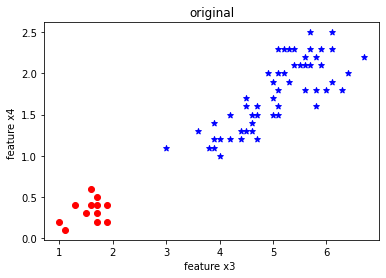

BESVM Accuracy (on training) = with x3 bounded error (30%*0.632),x4 with error (30%*0.367) : 1.0
BESVM Accuracy (on testing) = with x3 bounded error (30%*0.632),x4 with error (30%*0.367 : 0.9850746268656716


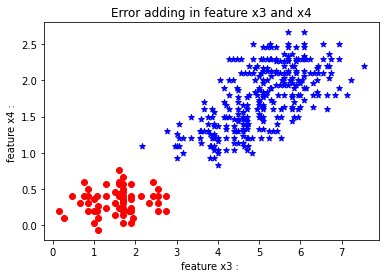

In [292]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x3 ')
plt.ylabel('feature x4 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x3 bounded error (30%*0.632),x4 with error (30%*0.367) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x3 bounded error (30%*0.632),x4 with error (30%*0.367 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x3 and x4')
plt.xlabel('feature x3 : ')
plt.ylabel('feature x4 : ')
plt.show()


In [293]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x3,x4 no err : '+str(result_be_test))


Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x3,x4 no err : 1.0


In [294]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x3'].mean()*0.1101
e2 = temp['x4'].mean()*0.1896

for idx,cell in temp['x3'].iteritems():
    temp['x3'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x3'].iteritems():
    temp['x3'][idx] = temp['x3'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x4'].iteritems():
    temp['x4'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x4'].iteritems():
    temp['x4'][idx] = temp['x4'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,1.7,0.4000,0.0
1,1.1,0.1000,0.0
2,1.3,0.4000,0.0
3,1.7,0.3000,0.0
4,1.5,0.3000,0.0
...,...,...,...
330,5.2,2.0156,1.0
331,5.0,1.6156,1.0
332,5.2,1.7156,1.0
333,5.4,2.0156,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


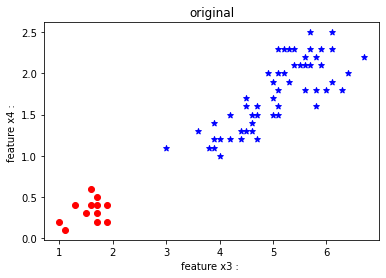

BESVM Accuracy (on training) = with x3 bounded error (30%*0.367),x4 with error (30%*0.632) : 1.0
BESVM Accuracy (on testing) = with x3 bounded error (30%*0.367),x4 with error (30%*0.632) : 1.0


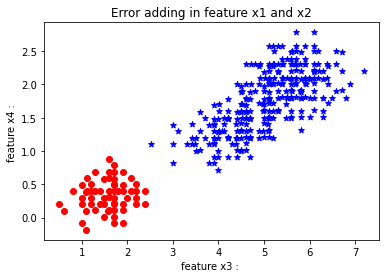

In [295]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x3 : ')
plt.ylabel('feature x4 : ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x3 bounded error (30%*0.367),x4 with error (30%*0.632) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x3 bounded error (30%*0.367),x4 with error (30%*0.632) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x3 : ')
plt.ylabel('feature x4 : ')
plt.show()


In [296]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with x3,x4 no err : '+str(result_be_test))


Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with x3,x4 no err : 1.0
